In [0]:
#Packages used for graph analysis
import networkx as nx
import networkx.algorithms.community as nxcom
import random
import numpy as np
from numpy import random as nprand
import community
from scipy.cluster import hierarchy
from scipy.spatial import distance
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [0]:
%matplotlib inline

In [0]:
#reads the email university network text file and sets up as an undirected graph.
G = nx.read_weighted_edgelist("email.txt", create_using = nx.Graph(), nodetype = int)

In [25]:
#Provides basic information about the created network
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1133
Number of edges: 5452
Average degree:   9.6240


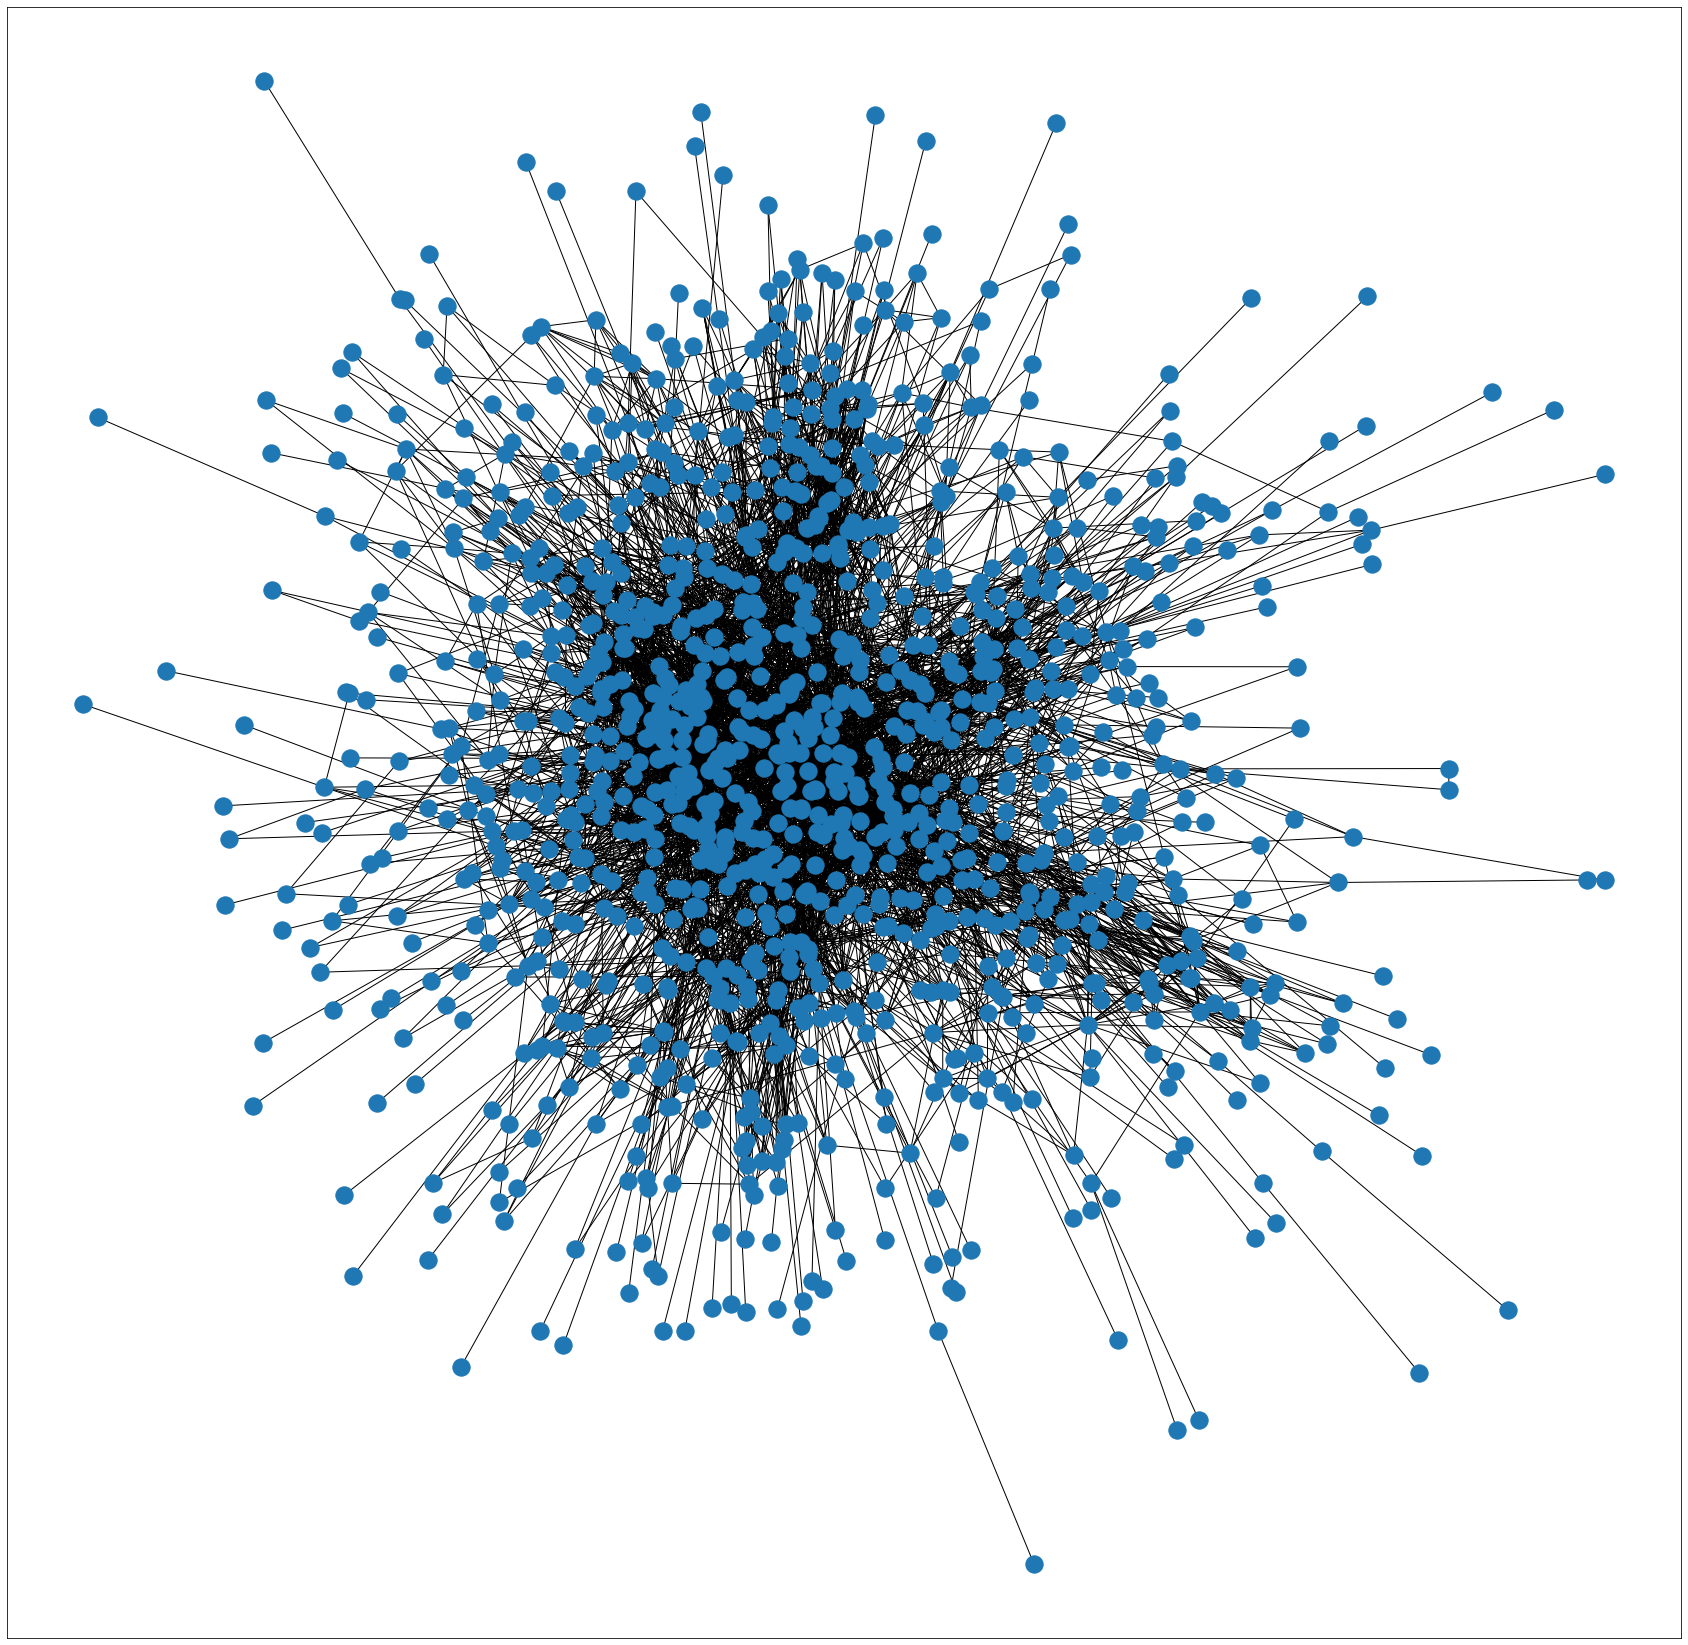

In [14]:
#plots the G network in the spring_layout
plt.figure(figsize=(30,30))
pos = nx.spring_layout(G)
a = nx.draw_networkx(G, with_labels=False, pos = pos)
plt.show

plt.savefig('Network.png')

In [0]:
#Sorts for the 5 nodes with the highest degree centrality
degCent = nx.degree_centrality(G)
sorted(degCent, key=degCent.get, reverse=True)[:5]

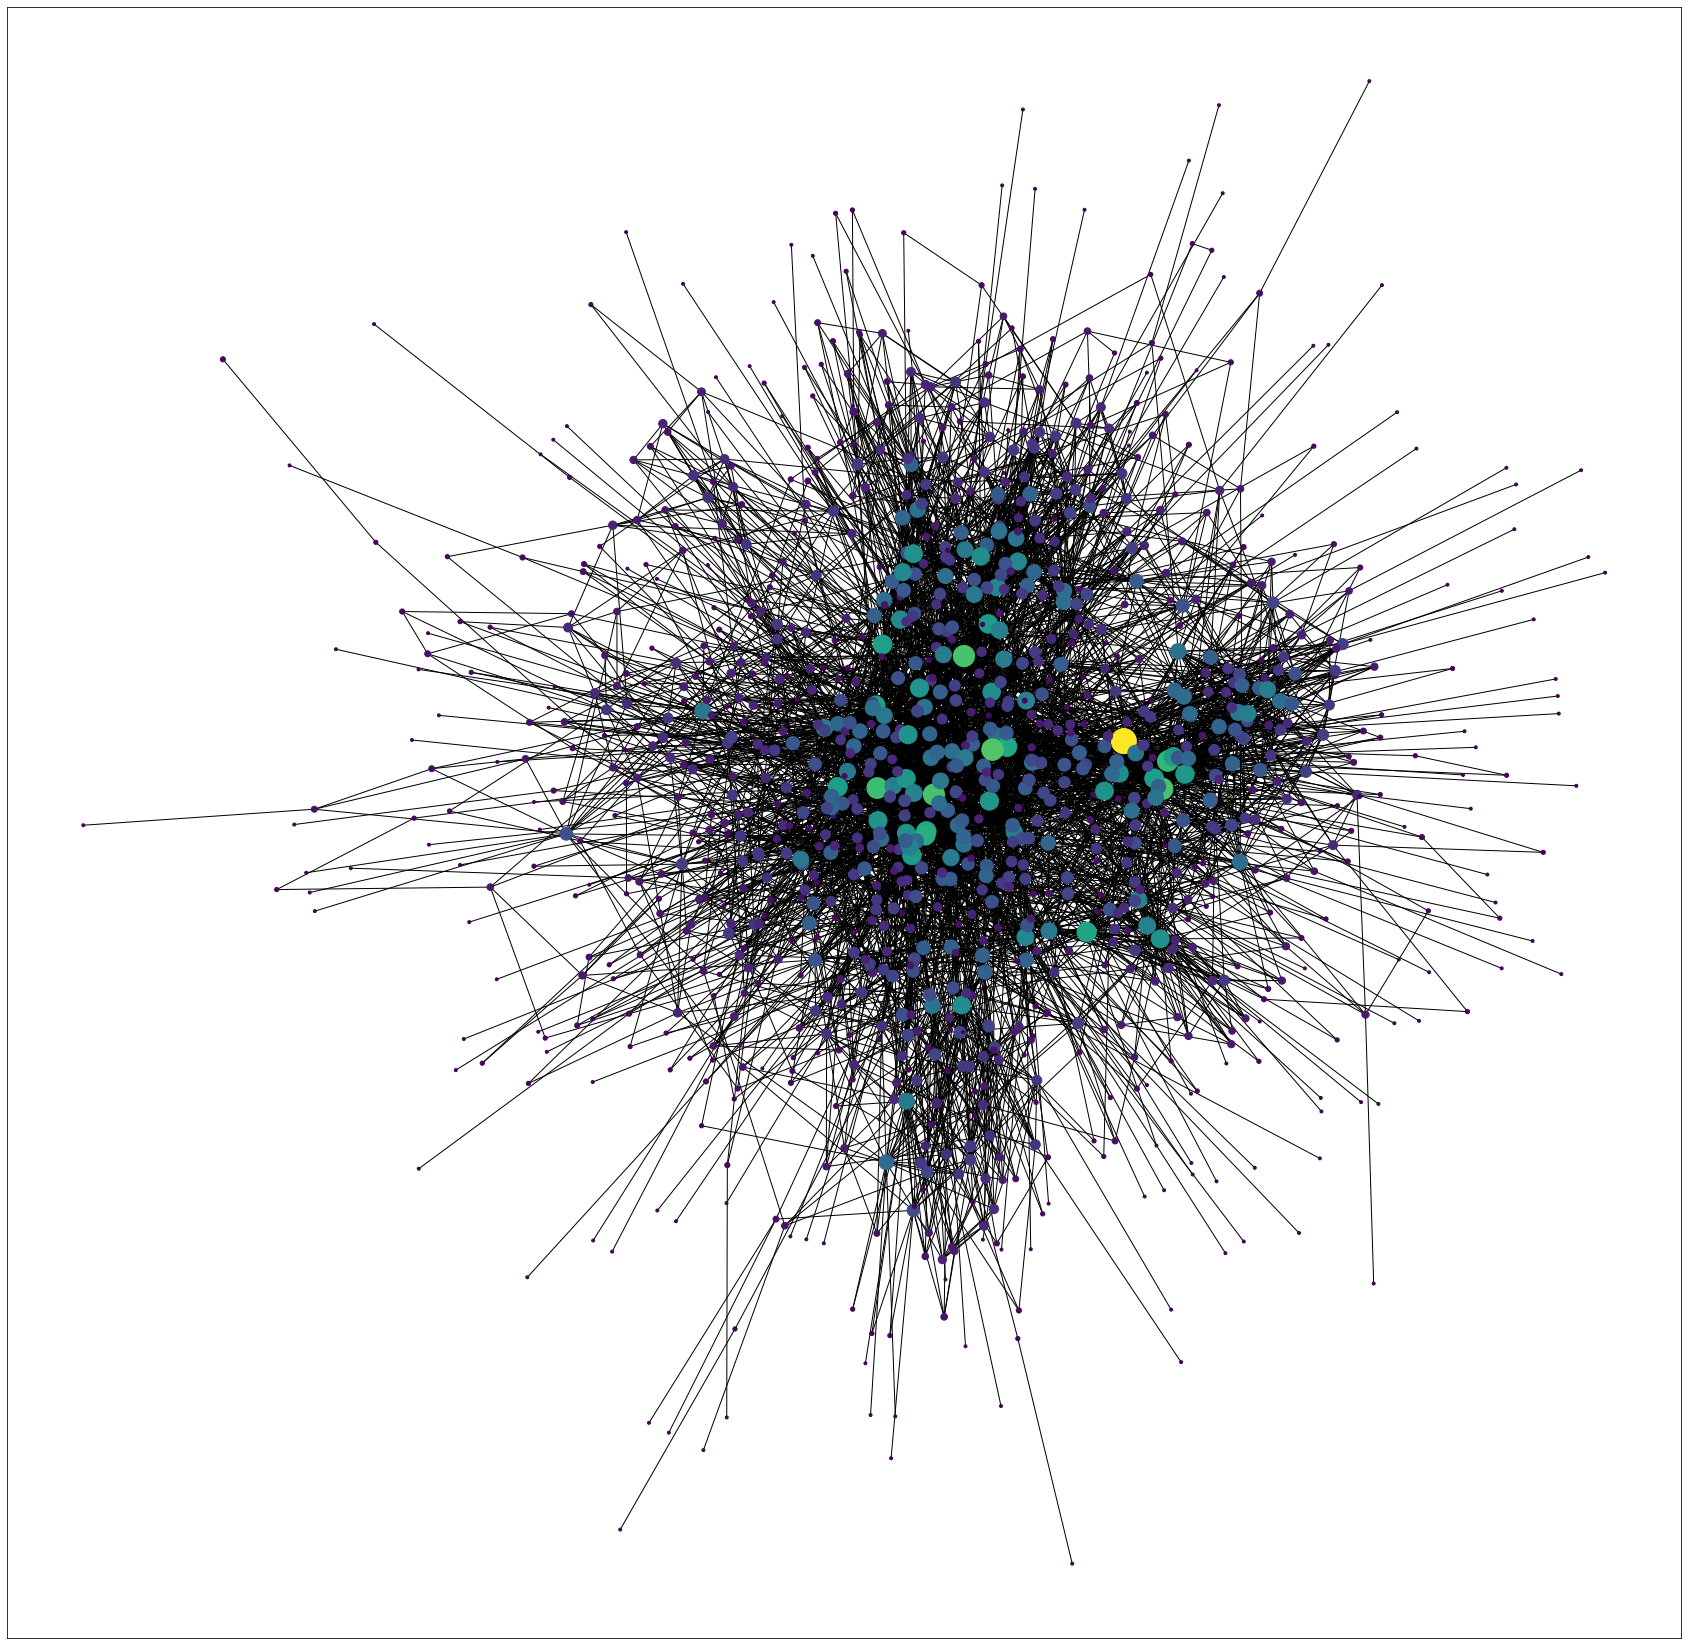

In [23]:
#Visualising network based on degree centrality of nodes
pos = nx.spring_layout(G)
degCent = nx.degree_centrality(G)
node_color=[20000.0 * G.degree(v)for v in G]
node_size=[v*10000 for v in degCent.values()]
plt.figure(figsize=(30,30))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 node_color = node_color,
                 node_size = node_size)

plt.savefig('DegreeOriginal.png')

In [20]:
#Sorts for the 5 nodes with the highest betweenness centrality
betCent = nx.betweenness_centrality(G)
sorted(betCent, key=betCent.get, reverse=True)[:5]


[333, 105, 23, 578, 76]

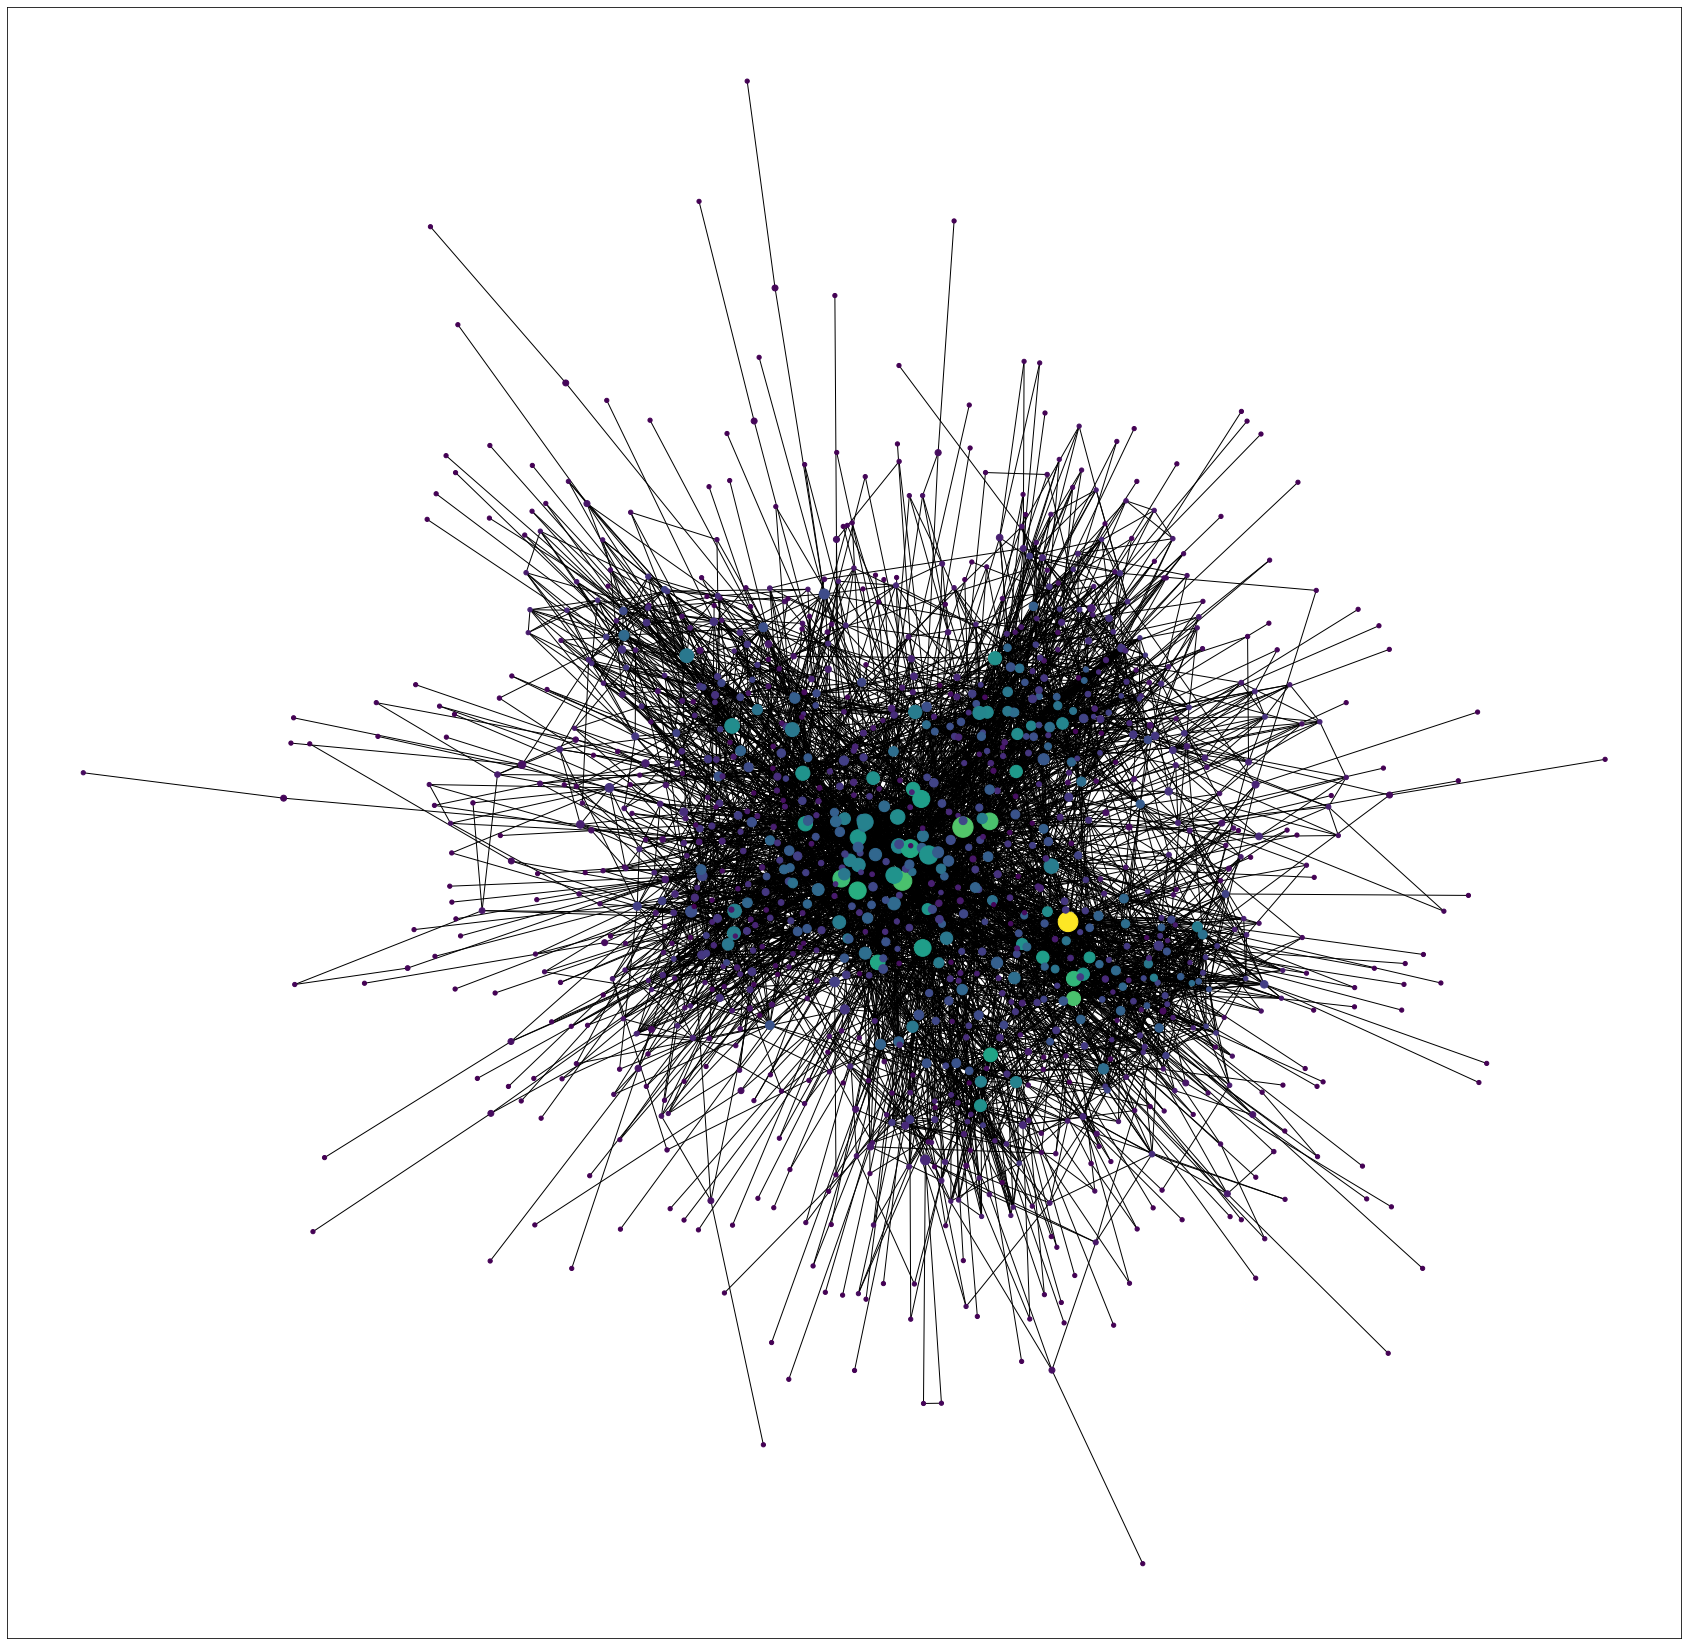

In [22]:
#Visualising network based on betweenness centrality of nodes
pos = nx.spring_layout(G)
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color=[20000.0 * G.degree(v)for v in G]
node_size=[v*10000 for v in betCent.values()]
plt.figure(figsize=(30,30))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 node_color = node_color,
                 node_size = node_size)

plt.savefig('BetweenOriginal.png')

In [19]:
#Sorts for the 5 nodes with the highest closeness centrality
closCent = nx.closeness_centrality(G)
sorted(closCent, key=closCent.get, reverse=True)[:5]

[105, 333, 16, 23, 42]

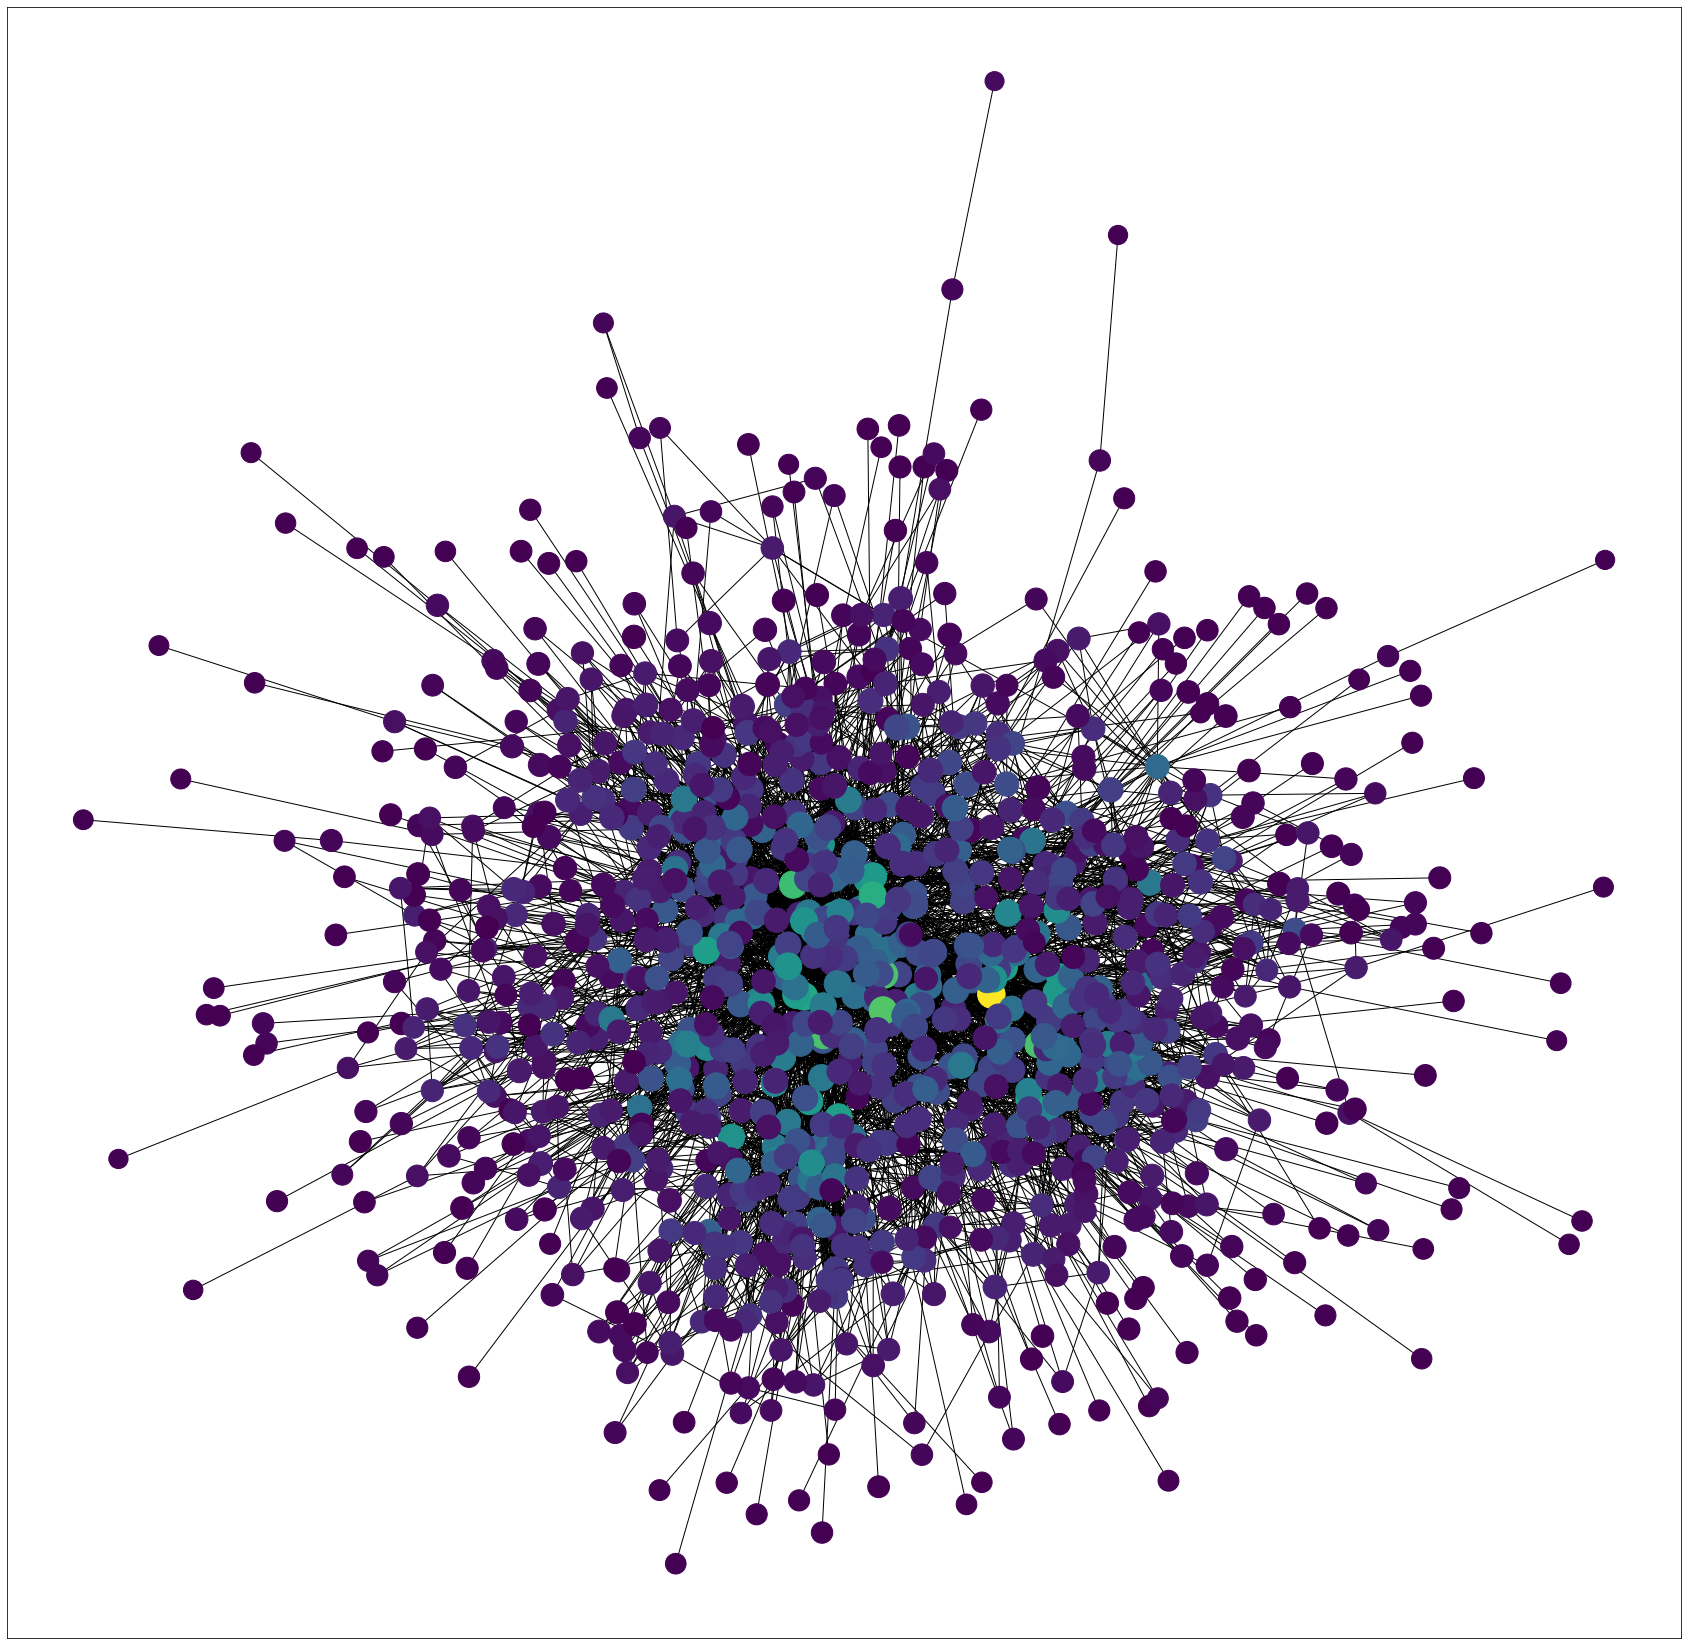

In [24]:
#Visualising network based on closeness centrality of nodes
pos = nx.spring_layout(G)
closCent = nx.closeness_centrality(G)
node_color=[20000.0 * G.degree(v)for v in G]
node_size=[v*2000 for v in closCent.values()]
plt.figure(figsize=(30,30))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 node_color = node_color,
                 node_size = node_size)

plt.savefig('ClosenessOriginal')

In [27]:
#Discovers density of the network
nx.density(G)

0.0085017730219967

In [28]:
#Discovers the diameter of the network
nx.diameter(G)

8

In [30]:
#creates a list of communities in the graph network
communities = nxcom.greedy_modularity_communities(G)
list(communities)

[frozenset({1,
            2,
            3,
            4,
            5,
            6,
            7,
            8,
            9,
            10,
            11,
            13,
            14,
            15,
            16,
            17,
            18,
            19,
            20,
            21,
            22,
            23,
            24,
            25,
            26,
            27,
            28,
            30,
            32,
            33,
            34,
            35,
            36,
            37,
            38,
            39,
            41,
            43,
            45,
            46,
            48,
            50,
            52,
            53,
            54,
            57,
            58,
            59,
            60,
            61,
            62,
            64,
            65,
            66,
            67,
            68,
            69,
            70,
            71,
            72,
            76,
            78,
            80,
 

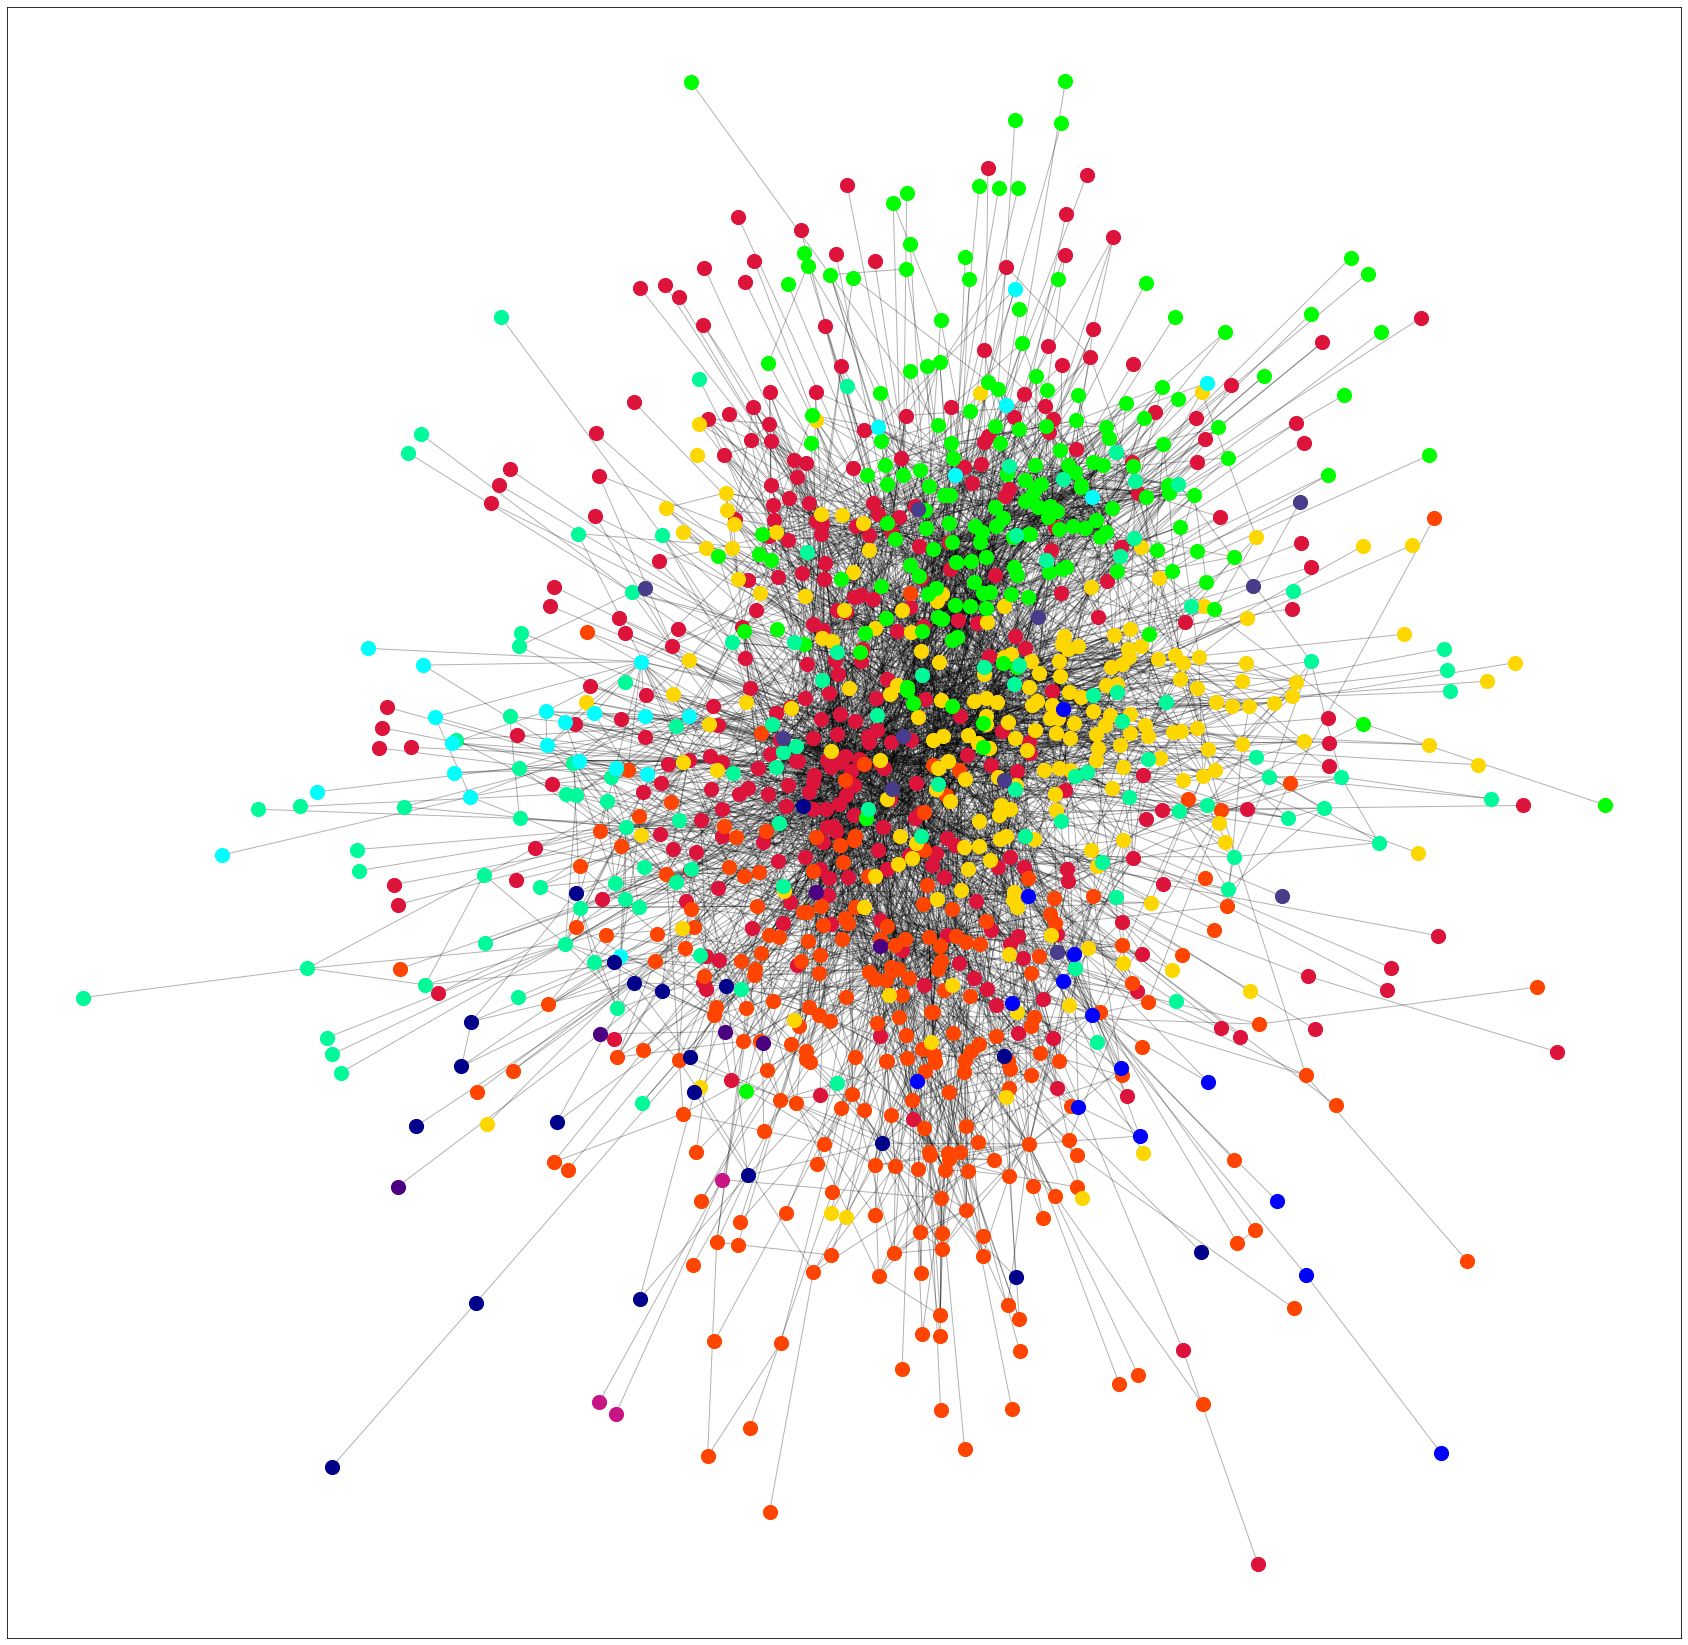

In [31]:
#Visualises the communities on the graph via colour coding.
plt.figure(figsize=(30,30))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(communities[0], pos, node_size=200, node_color='#DC143C')
nx.draw_networkx_nodes(communities[1], pos, node_size=200, node_color='#FF4500')
nx.draw_networkx_nodes(communities[2], pos, node_size=200, node_color='#FFD700')
nx.draw_networkx_nodes(communities[3], pos, node_size=200, node_color='#00FF00')
nx.draw_networkx_nodes(communities[4], pos, node_size=200, node_color='#00FA9A')
nx.draw_networkx_nodes(communities[5], pos, node_size=200, node_color='#00FFFF')
nx.draw_networkx_nodes(communities[6], pos, node_size=200, node_color='#00008B')
nx.draw_networkx_nodes(communities[7], pos, node_size=200, node_color='#0000FF')
nx.draw_networkx_nodes(communities[8], pos, node_size=200, node_color='#483D8B')
nx.draw_networkx_nodes(communities[9], pos, node_size=200, node_color='#4B0082')
nx.draw_networkx_nodes(communities[10], pos, node_size=200, node_color='#C71585')
nx.draw_networkx_edges(G, pos, alpha=0.3)

plt.savefig('Communities1.png')

In [32]:
#Clustering co-efficient of network G
nx.average_clustering(G)

0.2201760865041161

In [33]:
#Transitivity of network G
nx.transitivity(G)

0.16625006482393817

In [0]:
#Packages required for facebook analysis 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#reads the fox and friends csv file with correct encoding
df = pd.read_csv('foxandfriends.csv', encoding='utf-16')
#limits the dataset to the time period being discussed
dfsubset = df[(df.posted_at >= '2016-09-07') & (df.posted_at <= '2016-11-07')]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



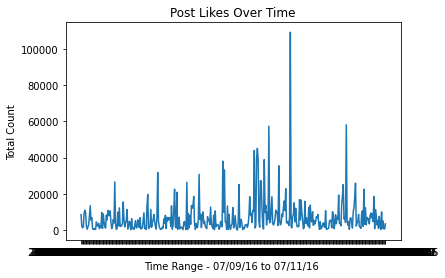

In [38]:
#Creating a time series of total like count vs time of posting.
plt.plot(dfsubset.posted_at, dfsubset.likes_count)
ax = plt.subplot(111)
chartBox = ax.get_position()
plt.xlabel("Time Range - 07/09/16 to 07/11/16 ")
plt.ylabel("Total Count")
plt.title("Post Likes Over Time")
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*1, chartBox.height])
plt.savefig('LikesOverTime')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



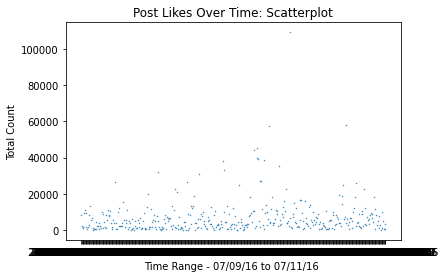

In [39]:
#Creating a scatter plot of the total like count vs time of posting
plt.scatter(dfsubset.posted_at, dfsubset.likes_count, alpha = 1, s=0.2)
ax = plt.subplot(111)
chartBox = ax.get_position()
plt.xlabel("Time Range - 07/09/16 to 07/11/16 ")
plt.ylabel("Total Count")
plt.title("Post Likes Over Time: Scatterplot")
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*1, chartBox.height])
plt.savefig('LikesOverTimeScatt')

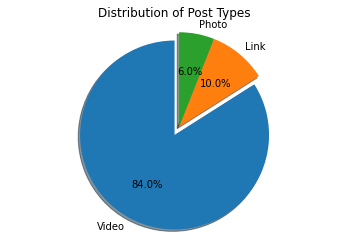

In [41]:
#Pie chart code. Used here for distribution of upload types.
labels = ('Video', 'Link','Photo')
sizes = (0.84, 0.1 ,0.06)
explode =(0.1,0,0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels = labels, autopct ='%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal') 

plt.title("Distribution of Post Types")
plt.savefig('PieAmount.png')
plt.show()



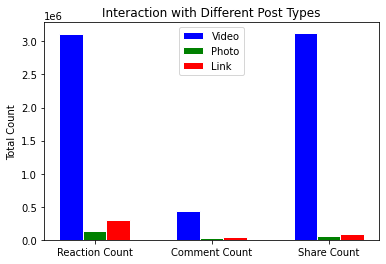

In [42]:
#Plots a multi bar bar chart. Each x variable contains 3 vars that are mirrored across each x variable. In this case likes, shares and comments against each type of upload medium.
barWidth = 0.2

bars1 = (3119303, 435548, 3131652)
bars2 = (129708, 23388, 54599)
bars3 = (306063, 46903, 91304)

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='white', label='Video')
plt.bar(r2, bars2, color='g', width=barWidth, edgecolor='white', label='Photo')
plt.bar(r3, bars3, color='r', width=barWidth, edgecolor='white', label='Link')

plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Reaction Count', 'Comment Count', 'Share Count', 'D', 'E'])

plt.xlabel("")
plt.ylabel("Total Count")
plt.title("Interaction with Different Post Types")

plt.legend()
plt.savefig('InteractionPerType')
plt.show()


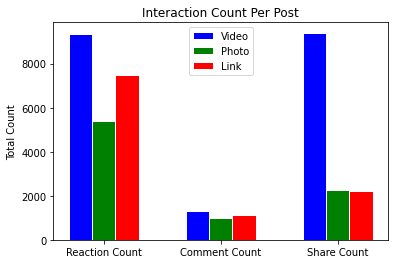

In [43]:
#The same functionality as above. This takes the average count to from a per post bar chart. 
barWidth = 0.2

bars1 = (9367, 1307, 9404)
bars2 = (5405, 974, 2275)
bars3 = (7465, 1144, 2227)

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='white', label='Video')
plt.bar(r2, bars2, color='g', width=barWidth, edgecolor='white', label='Photo')
plt.bar(r3, bars3, color='r', width=barWidth, edgecolor='white', label='Link')

plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Reaction Count', 'Comment Count', 'Share Count', 'D', 'E'])

plt.xlabel("")
plt.ylabel("Total Count")
plt.title("Interaction Count Per Post")

plt.legend()
plt.savefig('InteractionPerPost')
plt.show()

In [46]:
#Displays the 10 lowest posts by like count
dfsubset.likes_count.sort_values()[:10]

5755    102
5725    210
5754    246
5616    254
5684    263
5688    264
5567    266
5942    283
5690    296
5700    316
Name: likes_count, dtype: int64

In [49]:
#Displays the 10 highest posts by like count
dfsubset.likes_count.sort_values()[-10:]

5809     35445
5736     38008
5790     38903
5782     38961
5780     39608
5777     43946
5781     45114
5796     57329
5897     58062
5824    109100
Name: likes_count, dtype: int64